In [1]:
from config import *

Тепрь цель добавть augmentation к изображениям с учётом масок

Необходимо, чтобы и изображение и маска трансформировались идентично для отражений и поворотов. И отдельно для добавления шума и изменения яркости

In [2]:
from src.data.dataset import SatelliteDataset
from src.data.paired_transforms.random_crop import PairedRandomCrop
from src.data.paired_transforms.random_flips import PairedRandomHorizontalFlip, PairedRandomVerticalFlip
from src.data.paired_transforms.random_rotation import PairedRandomRotation
from src.data.utils import create_dataloaders, show_dataloader_examples
from src.data.transforms.image_distortions import *

from torchvision.transforms import v2
import torch

In [3]:
image_transforms = v2.Compose([
    RandomHue((-0.05,0.05)),
    RandomSaturation(),
    RandomBrightness(),
    RandomContrast(),
    v2.ToDtype(torch.float32, scale=True),
])

In [4]:
paired_transforms = v2.Compose([
    PairedRandomHorizontalFlip(),
    PairedRandomVerticalFlip(),
    PairedRandomCrop(INPUT_IMG_SIZE),
    PairedRandomRotation()
])
dataset = SatelliteDataset(IMAGES_DIR, MASKS_DIR, paired_transforms, image_transforms)
train_dataloader, test_dataloader = create_dataloaders(dataset)

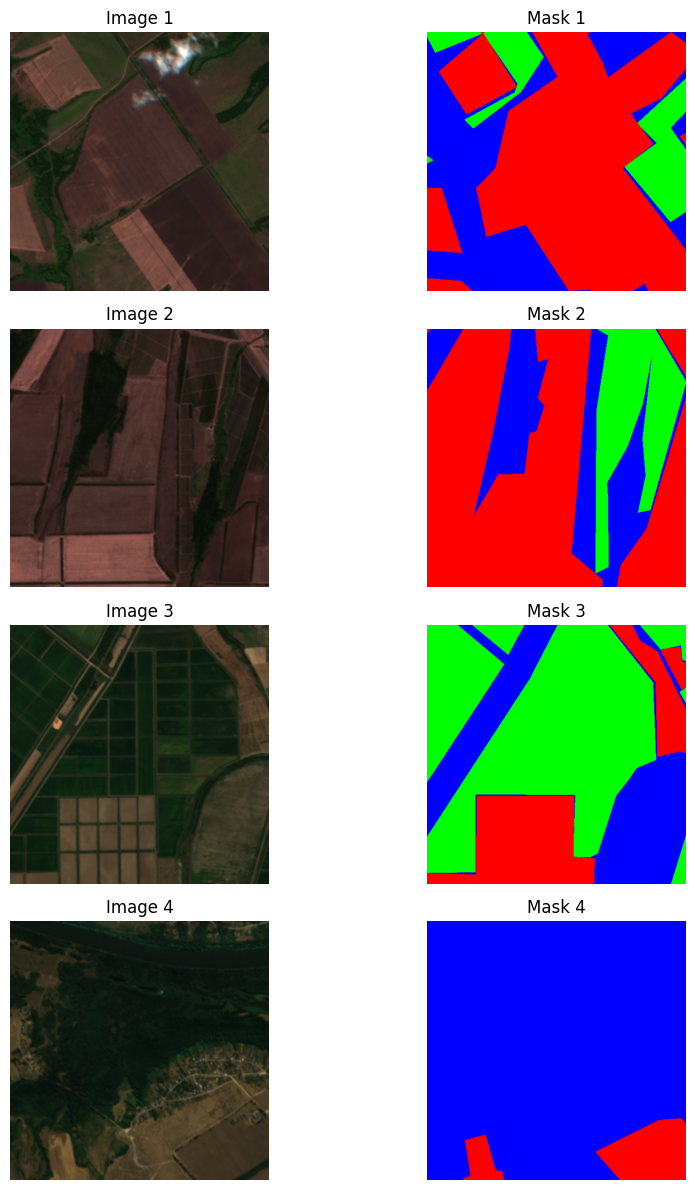

In [5]:
show_dataloader_examples(train_dataloader)

Отлично, маски совпадают с изображениями